# importing modules

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn import metrics 
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading Dataset

In [42]:
df = pd.read_csv(r"C:\Users\ajayk\Desktop\Machine Learning\Condition_Monitoring_of_Hydraulic_System.csv")

In [43]:
df

,Unnamed: 0,PS1,PS2,PS3,PS4,PS5,FS1,TS1,TS2,TS3,TS4,CE,CP,SE,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc,y_stableFlag
0,0,160.673492,109.466914,1.991475,9.842170,9.728098,6.709815,35.621983,40.978767,38.471017,31.745250,39.601350,1.862750,59.157183,3,100,0,130,1
1,1,160.603320,109.354890,1.976234,9.635142,9.529488,6.715315,36.676967,41.532767,38.978967,34.493867,25.786433,1.255550,59.335617,3,100,0,130,1
2,2,160.347720,109.158845,1.972224,9.530548,9.427949,6.718522,37.880800,42.442450,39.631950,35.646150,22.218233,1.113217,59.543150,3,100,0,130,1
3,3,160.188088,109.064807,1.946575,9.438827,9.337430,6.720565,38.879050,43.403983,40.403383,36.579467,20.459817,1.062150,59.794900,3,100,0,130,1
4,4,160.000472,108.931434,1.922707,9.358762,9.260636,6.690308,39.803917,44.332750,41.310550,37.427900,19.787017,1.070467,59.455267,3,100,0,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,161.227572,109.779581,2.001438,9.972037,9.850361,6.689930,35.313783,40.874800,38.269267,30.404733,46.628517,2.160600,59.033100,100,100,0,90,0
2201,2201,161.206070,109.787481,1.998781,9.966184,9.844854,6.692182,35.321600,40.868883,38.268250,30.416233,46.689817,2.151450,59.068000,100,100,0,90,0
2202,2202,161.192120,109.756174,1.993436,9.964329,9.842628,6.693277,35.319183,40.875950,38.246367,30.426250,46.472300,2.143300,59.132350,100,100,0,90,0
2203,2203,161.208917,109.793884,2.007077,9.968232,9.846690,6.684128,35.324767,40.876067,38.245733,30.414283,46.544967,2.148483,58.970800,100,100,0,90,0


In [44]:
df.columns

Index(['Unnamed: 0', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'FS1', 'TS1', 'TS2',
       'TS3', 'TS4', 'CE', 'CP', 'SE', 'y_coolerCondition', 'y_valveCondition',
       'y_pumpLeak', 'y_hydraulicAcc', 'y_stableFlag'],
      dtype='object')

In [45]:
df.head()

,Unnamed: 0,PS1,PS2,PS3,PS4,PS5,FS1,TS1,TS2,TS3,TS4,CE,CP,SE,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc,y_stableFlag
0,0,160.673492,109.466914,1.991475,9.842170,9.728098,6.709815,35.621983,40.978767,38.471017,31.745250,39.601350,1.862750,59.157183,3,100,0,130,1
1,1,160.603320,109.354890,1.976234,9.635142,9.529488,6.715315,36.676967,41.532767,38.978967,34.493867,25.786433,1.255550,59.335617,3,100,0,130,1
2,2,160.347720,109.158845,1.972224,9.530548,9.427949,6.718522,37.880800,42.442450,39.631950,35.646150,22.218233,1.113217,59.543150,3,100,0,130,1
3,3,160.188088,109.064807,1.946575,9.438827,9.337430,6.720565,38.879050,43.403983,40.403383,36.579467,20.459817,1.062150,59.794900,3,100,0,130,1
4,4,160.000472,108.931434,1.922707,9.358762,9.260636,6.690308,39.803917,44.332750,41.310550,37.427900,19.787017,1.070467,59.455267,3,100,0,130,1


In [46]:
df.tail()

,Unnamed: 0,PS1,PS2,PS3,PS4,PS5,FS1,TS1,TS2,TS3,TS4,CE,CP,SE,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc,y_stableFlag
2200,2200,161.227572,109.779581,2.001438,9.972037,9.850361,6.689930,35.313783,40.874800,38.269267,30.404733,46.628517,2.160600,59.03310,100,100,0,90,0
2201,2201,161.206070,109.787481,1.998781,9.966184,9.844854,6.692182,35.321600,40.868883,38.268250,30.416233,46.689817,2.151450,59.06800,100,100,0,90,0
2202,2202,161.192120,109.756174,1.993436,9.964329,9.842628,6.693277,35.319183,40.875950,38.246367,30.426250,46.472300,2.143300,59.13235,100,100,0,90,0
2203,2203,161.208917,109.793884,2.007077,9.968232,9.846690,6.684128,35.324767,40.876067,38.245733,30.414283,46.544967,2.148483,58.97080,100,100,0,90,0
2204,2204,161.217128,109.792177,2.002690,9.973638,9.851949,6.692302,35.322233,40.859400,38.248917,30.390800,46.647933,2.157050,59.05390,100,100,0,90,0


In [47]:
df.describe()

,Unnamed: 0,PS1,PS2,PS3,PS4,PS5,FS1,TS1,TS2,TS3,TS4,CE,CP,SE,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc,y_stableFlag
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,1102.000000,160.485315,109.379906,1.753227,9.163320,9.079363,6.198549,45.424567,50.365979,47.662121,40.735654,31.299077,1.808399,55.287900,41.240816,90.693878,0.669388,107.199546,0.342857
std,636.672993,4.699425,4.986585,0.251902,0.576296,0.549589,1.032883,7.991933,7.396254,7.451888,8.107878,11.575330,0.278263,8.960189,42.383143,10.681802,0.817233,16.435848,0.474772
min,0.000000,155.391547,104.406307,0.840252,8.365800,8.321527,2.018572,35.313783,40.859400,38.245733,30.390800,17.555983,1.062150,18.276617,3.000000,73.000000,0.000000,90.000000,0.000000
25%,551.000000,158.100195,106.962382,1.729733,8.547239,8.487167,6.391670,36.237150,41.864183,39.123183,31.272567,20.084650,1.550100,56.270183,3.000000,80.000000,0.000000,90.000000,0.000000
50%,1102.000000,158.960895,107.730169,1.779631,9.115781,9.031516,6.576673,44.836650,49.780583,47.070250,40.429050,27.392533,1.739683,58.758150,20.000000,100.000000,0.000000,100.000000,0.000000
75%,1653.000000,161.000735,109.421612,1.932047,9.844351,9.729275,6.657508,54.104317,58.584467,55.694433,49.409500,46.677383,2.148483,59.656900,100.000000,100.000000,1.000000,130.000000,1.000000
max,2204.000000,180.922708,131.589089,2.023398,9.978510,9.856591,6.722707,57.899283,61.958467,59.423167,53.060417,47.903667,2.840100,60.755300,100.000000,100.000000,2.000000,130.000000,1.000000


# Assigning values to X & y

In [48]:
X = df[['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'FS1', 'TS1', 'TS2', 'TS3', 'TS4', 'CE', 'CP', 'SE']]
y = df[['y_coolerCondition', 'y_valveCondition', 'y_pumpLeak', 'y_hydraulicAcc']]

In [49]:
X

,PS1,PS2,PS3,PS4,PS5,FS1,TS1,TS2,TS3,TS4,CE,CP,SE
0,160.673492,109.466914,1.991475,9.842170,9.728098,6.709815,35.621983,40.978767,38.471017,31.745250,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,9.635142,9.529488,6.715315,36.676967,41.532767,38.978967,34.493867,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,9.530548,9.427949,6.718522,37.880800,42.442450,39.631950,35.646150,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946575,9.438827,9.337430,6.720565,38.879050,43.403983,40.403383,36.579467,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,9.358762,9.260636,6.690308,39.803917,44.332750,41.310550,37.427900,19.787017,1.070467,59.455267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,161.227572,109.779581,2.001438,9.972037,9.850361,6.689930,35.313783,40.874800,38.269267,30.404733,46.628517,2.160600,59.033100
2201,161.206070,109.787481,1.998781,9.966184,9.844854,6.692182,35.321600,40.868883,38.268250,30.416233,46.689817,2.151450,59.068000
2202,161.192120,109.756174,1.993436,9.964329,9.842628,6.693277,35.319183,40.875950,38.246367,30.426250,46.472300,2.143300,59.132350
2203,161.208917,109.793884,2.007077,9.968232,9.846690,6.684128,35.324767,40.876067,38.245733,30.414283,46.544967,2.148483,58.970800


In [50]:
y

,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc
0,3,100,0,130
1,3,100,0,130
2,3,100,0,130
3,3,100,0,130
4,3,100,0,130
...,...,...,...,...
2200,100,100,0,90
2201,100,100,0,90
2202,100,100,0,90
2203,100,100,0,90


# Splitting dataset to training & testing sets

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [52]:
X_train

,PS1,PS2,PS3,PS4,PS5,FS1,TS1,TS2,TS3,TS4,CE,CP,SE
1799,160.892637,109.507279,1.984865,9.835694,9.720131,6.692268,36.275300,41.899300,39.169967,31.289350,47.274633,2.157517,59.085550
34,157.834473,107.089634,1.732460,8.742354,8.678554,6.635743,50.388083,54.987867,51.869100,46.362183,18.633850,1.406133,60.338533
186,157.052477,106.371233,1.736454,8.543785,8.483880,6.588178,54.108133,58.742533,55.727983,49.485850,19.830617,1.545750,60.389417
1206,158.950350,107.919246,1.799209,9.166478,9.082647,6.664357,44.405900,49.474900,46.690850,39.871017,27.748533,1.783467,59.637933
1699,160.500193,109.107011,1.918447,9.937557,9.818778,6.429422,35.709317,41.243483,38.589283,30.653267,47.836783,2.180650,55.653433
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,161.008537,109.516151,2.003327,9.968005,9.846836,6.695602,35.434083,41.100033,38.398267,30.554350,46.424367,2.147067,58.945533
1993,160.651385,108.934661,1.934658,9.828592,9.712992,6.490760,36.331350,41.953233,39.212100,31.376150,46.610583,2.141000,56.679650
1064,158.684340,107.724603,1.814853,9.066613,8.986242,6.663532,45.509450,50.457900,47.768817,40.966983,28.020533,1.770233,59.871617
742,157.218380,106.344960,1.757120,8.770578,8.707083,6.606300,50.551817,55.771867,53.093483,45.529883,26.626767,1.898600,59.584967


In [53]:
y_train

,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc
1799,100,100,0,115
34,3,100,0,130
186,3,100,0,130
1206,20,100,0,100
1699,100,90,2,130
...,...,...,...,...
1512,100,100,0,90
1993,100,80,1,100
1064,20,100,0,130
742,20,100,0,90


In [54]:
X_test

,PS1,PS2,PS3,PS4,PS5,FS1,TS1,TS2,TS3,TS4,CE,CP,SE
1478,160.603557,109.190816,1.970787,9.862875,9.747467,6.672465,36.599683,42.384583,39.772267,31.184867,47.020250,2.337283,58.714050
1254,158.813303,107.102188,1.754382,9.179447,9.092239,6.427283,44.110667,49.116083,46.367083,39.769433,27.169333,1.732100,56.530850
604,156.225400,105.488050,1.720778,8.430153,8.382914,6.557222,56.634000,61.164900,58.153450,52.094900,18.827033,1.461650,59.944850
1789,160.996230,109.619760,1.996574,9.829711,9.715488,6.714625,36.255217,41.881367,39.141950,31.199067,47.733000,2.174567,59.481850
1110,158.100195,107.325104,1.731473,9.129171,9.045512,6.366933,44.842400,49.780383,47.070300,40.407333,27.645583,1.740983,56.387217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,158.547728,106.934395,1.725473,9.184036,9.099751,6.334163,44.164700,49.203550,46.436317,39.766483,27.448317,1.747983,55.258300
2146,160.694295,109.390745,1.940187,9.926021,9.807358,6.505865,35.582183,41.239583,38.494400,30.638300,46.795933,2.151667,57.098117
1524,161.029127,109.586929,2.010691,9.957976,9.838949,6.683253,35.412917,41.063217,38.385733,30.504733,46.648500,2.154450,58.873900
1690,160.576552,108.901325,1.920976,9.943159,9.823674,6.418158,35.658817,41.240633,38.562733,30.640217,47.256683,2.177267,55.329133


In [55]:
y_test

,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc
1478,100,100,0,90
1254,20,73,1,100
604,3,100,0,90
1789,100,100,0,130
1110,20,100,2,115
...,...,...,...,...
1212,20,73,2,100
2146,100,100,1,90
1524,100,100,0,90
1690,100,80,2,130


# Initialize separate classifiers for each target variable

In [56]:
knn_cooler = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn_valve = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn_pump = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn_hydraulic = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn_stable = KNeighborsClassifier(n_neighbors=5)

# Fit each classifier on the corresponding target variable

In [57]:
knn_cooler.fit(X_train[['CE', 'CP', 'PS4', 'PS5', 'TS1', 'TS2', 'TS3', 'TS4']], y_train['y_coolerCondition'])
knn_valve.fit(X_train[['PS2', 'PS3']], y_train['y_valveCondition'])
knn_pump.fit(X_train[['FS1', 'SE', 'PS1']], y_train['y_pumpLeak'])
knn_hydraulic.fit(X_train[['PS1', 'PS2', 'PS3', 'SE', 'FS1', 'TS2']], y_train['y_hydraulicAcc'])

OneVsRestClassifier(estimator=KNeighborsClassifier())

# Make predictions on the test data for each classifier

In [58]:
y_pred_cooler = knn_cooler.predict(X_test[['CE', 'CP', 'PS4', 'PS5', 'TS1', 'TS2', 'TS3', 'TS4']])
y_pred_valve = knn_valve.predict(X_test[['PS2', 'PS3']])
y_pred_pump = knn_pump.predict(X_test[['FS1', 'SE', 'PS1']])
y_pred_hydraulic = knn_hydraulic.predict(X_test[['PS1', 'PS2', 'PS3', 'SE', 'FS1', 'TS2']])

y_pred_prob_cooler = knn_cooler.predict_proba(X_test[['CE', 'CP', 'PS4', 'PS5', 'TS1', 'TS2', 'TS3', 'TS4']])
y_pred_prob_valve = knn_valve.predict_proba(X_test[['PS2', 'PS3']])
y_pred_prob_pump = knn_pump.predict_proba(X_test[['FS1', 'SE', 'PS1']])
y_pred_prob_hydraulic = knn_hydraulic.predict_proba(X_test[['PS1', 'PS2', 'PS3', 'SE', 'FS1', 'TS2']])

# Evaluate the performance for each classifier

In [59]:
accuracy_cooler = metrics.accuracy_score(y_test['y_coolerCondition'], y_pred_cooler)
accuracy_valve = metrics.accuracy_score(y_test['y_valveCondition'], y_pred_valve)
accuracy_pump = metrics.accuracy_score(y_test['y_pumpLeak'], y_pred_pump)
accuracy_hydraulic = metrics.accuracy_score(y_test['y_hydraulicAcc'], y_pred_hydraulic)

# Print results

In [60]:
print("Accuracy - Cooler Condition:",accuracy_cooler)
print("Accuracy - Valve Condition:",accuracy_valve)
print("Accuracy - Pump Leak:",accuracy_pump)
print("Accuracy - Hydraulic Acc:",accuracy_hydraulic)

Accuracy - Cooler Condition: 1.0
Accuracy - Valve Condition: 0.7868480725623582
Accuracy - Pump Leak: 0.9863945578231292
Accuracy - Hydraulic Acc: 0.9229024943310657


# Generate classification reports and confusion matrices

In [61]:
report_cooler = classification_report(y_test['y_coolerCondition'], y_pred_cooler)
matrix_cooler = confusion_matrix(y_test['y_coolerCondition'], y_pred_cooler)

report_valve = classification_report(y_test['y_valveCondition'], y_pred_valve)
matrix_valve = confusion_matrix(y_test['y_valveCondition'], y_pred_valve)

report_pump = classification_report(y_test['y_pumpLeak'], y_pred_pump)
matrix_pump = confusion_matrix(y_test['y_pumpLeak'], y_pred_pump)

report_hydraulic = classification_report(y_test['y_hydraulicAcc'], y_pred_hydraulic)
matrix_hydraulic = confusion_matrix(y_test['y_hydraulicAcc'], y_pred_hydraulic)

# Print classification reports and confusion matrices

In [62]:
print("Classification Report - Cooler Condition:")
print(report_cooler)
print("Confusion Matrix - Cooler Condition:")
print(matrix_cooler)
print("\n")

print("Classification Report - Valve Condition:")
print(report_valve)
print("Confusion Matrix - Valve Condition:")
print(matrix_valve)
print("\n")

print("Classification Report - Pump Leak:")
print(report_pump)
print("Confusion Matrix - Pump Leak:")
print(matrix_pump)
print("\n")

print("Classification Report - Hydraulic Acc:")
print(report_hydraulic)
print("Confusion Matrix - Hydraulic Acc:")
print(matrix_hydraulic)
print("\n")

Classification Report - Cooler Condition:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       139
          20       1.00      1.00      1.00       157
         100       1.00      1.00      1.00       145

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441

Confusion Matrix - Cooler Condition:
[[139   0   0]
 [  0 157   0]
 [  0   0 145]]


Classification Report - Valve Condition:
              precision    recall  f1-score   support

          73       0.82      0.70      0.75        76
          80       0.65      0.68      0.67        60
          90       0.64      0.72      0.68        67
         100       0.86      0.86      0.86       238

    accuracy                           0.79       441
   macro avg       0.74      0.74      0.74       441
weighted avg       0.79      0.79      0.79       441

Confusion Matrix

# Function to plot confusion matrix as heatmap

In [63]:
def plot_confusion_matrix_heatmap(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices as heatmaps

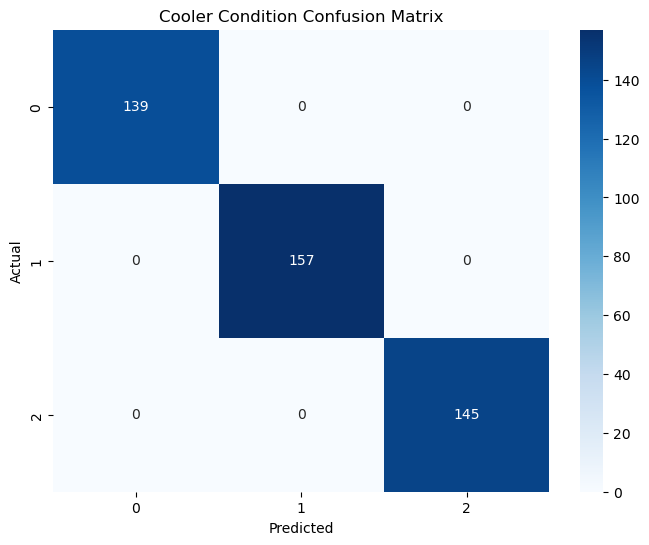

In [64]:
plot_confusion_matrix_heatmap(matrix_cooler, title='Cooler Condition Confusion Matrix')